## Reading the DHS + Nightlights dataset

**Incase DHS + Nightlights data isn't generated,** please follow the steps [below](#generating_dataset) for generating the dataset.

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
dhs_nightlights_df = pd.read_csv("../data/DHS_Nightlights/DHS_Nightlights_data.csv")

In [9]:
dhs_nightlights_df.head()

,Cluster Number,Mean_nightlight,Wealth Score
0,1.0,0.06,-0.386620
1,2.0,0.00,-0.421574
2,3.0,0.00,-0.449724
3,4.0,0.00,-0.390006
4,5.0,0.00,-0.416924


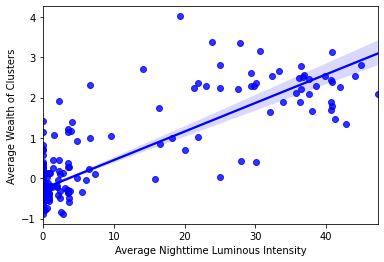

In [10]:
sns.regplot(x = "Mean_nightlight", y = "Wealth Score", data = dhs_nightlights_df, color = 'blue');
plt.xlabel("Average Nighttime Luminous Intensity");
plt.ylabel("Average Wealth of Clusters");
# plt.savefig('avgwealth_luminosity.png')

<a id='generating_dataset'></a>

## Generating DHS + Nightlights dataset

Importing DHS Survey data and nightlights features

In [1]:
# Magic commands to enable autoreload of imported packages
%load_ext autoreload
%autoreload 2

In [2]:
from poverty_predictor.get_dhsdata import GetDHSData
from poverty_predictor.merge_dataframes import merge_dhs, merge_night_dhs

Fetching DHS data

In [3]:
data = GetDHSData('../data/GPS/RWGE61FL.shp', '../data/Survey/RWHR61FL.dta')
gps_data = data.gps_df()
survey_data = data.survey_df()

In [4]:
dhs_data = merge_dhs(gps_data, survey_data)

Creating nightlight features and combining these features with DHS data

In [5]:
tiff_path = "../data/Nightlights/F182010.v4d_web.stable_lights.avg_vis.tif"
nightlight_dhs_df = merge_night_dhs(dhs_data, tiff_path)

Saving the combined dataframe in csv format.

In [6]:
nightlight_dhs_df.to_csv("../data/DHS_Nightlights/DHS_Nightlights_data.csv", index=False)